In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
POWER = 3
punish = 0.1
SAMPLE_CNT = 100
x_ = np.linspace(0, 1, SAMPLE_CNT)
noise = np.random.normal(0, 0.15, SAMPLE_CNT)
y_ = np.sin(2 * np.pi * x_) + noise
#y_ = 2 * x_ + 0.4

def generate_poly_vec(_a, _power):
    return map(lambda e: [e ** i for i in range(_power+1)], _a)


X_feature = generate_poly_vec(x_, POWER)
Y_label = np.reshape(y_, (-1, 1))

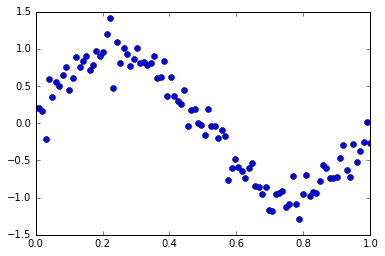

In [3]:
pl.plot(x_, y_, 'o')

In [4]:
W = tf.Variable(tf.zeros([(POWER + 1), 1]))
X = tf.placeholder("float", [None, POWER+1])
Y = tf.placeholder("float", [None, 1])

In [5]:
Y_ = tf.matmul(X, W)
minus = tf.sub(Y, Y_)
reg = tf.reduce_mean(tf.square(W))
loss = tf.reduce_sum(tf.square(minus)) #+ punish * tf.reduce_sum(tf.square(W))
op = tf.train.GradientDescentOptimizer(0.0015) 
#step设置过大时，会不收敛；过小，训练太慢； step的设置要和特征值大小匹配
#对于一些Variable，step可能很小，对于另一些可能很大，所以，我们希望Variable的scale能尽量一致
train = op.minimize(loss)

In [6]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

In [7]:
loss_last = 0
for i in range(50000):
    sess.run(train, feed_dict={X: X_feature,Y: Y_label})
    loss_now = sess.run(loss, feed_dict={X: X_feature,Y: Y_label})
    if np.abs(loss_last - loss_now) < 0.0001:
        break
    loss_last = loss_now
print loss_last


4.71968


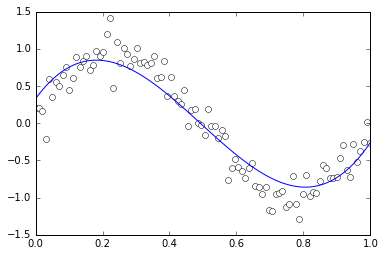

In [8]:
pl.plot(x_,y_, 'ow')
pl.plot(x_, np.dot(X_feature, sess.run(W)))

In [9]:
sess.run(W)


array([[  0.32927218],
       [  6.16978455],
       [-20.81527138],
       [ 14.05768204]], dtype=float32)